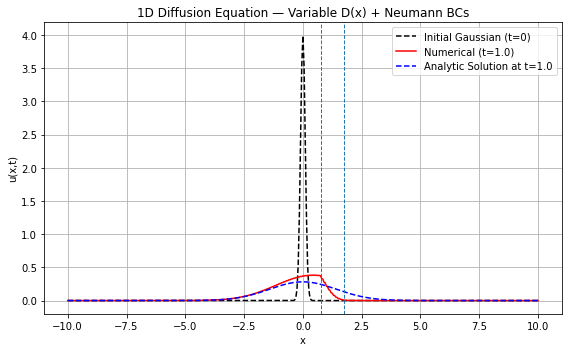

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nx_spaces = 400        # number of intervals
L = 10
Nx_points = Nx_spaces + 1
x = np.linspace(-L, L, Nx_points)

Nt_gaps = 30000
T = 1.0
Nt_points = Nt_gaps + 1
t = np.linspace(0., T, Nt_points)

dx = x[1] - x[0]
dt = t[1] - t[0]
C = dt / (2 * dx)


ix_screen = np.argmin(np.abs(x - 0.0))  # index closest to x=0


# Diffusion coefficient
def make_D(x, alpha, w):
    D = np.ones_like(x)
    D[np.abs(x - 1.25) <= w/2] = alpha   # reduce diffusion inside the screen region
    return D


D = make_D(x, 0.1, 1)


# Initial condition: Gaussian δ(x)
sigma = 2 * dx
u = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x)**2 / (2 * sigma**2))
u /= np.sum(u) * dx  # normalize mass
u0 = u.copy()

# Analytic Gaussian solution at time t = Nt*dt
t_exact = Nt_gaps * dt
u_exact = (1 / np.sqrt(4 * np.pi * t_exact)) * np.exp(- (x**2) / (4 * t_exact))
u_exact /= np.sum(u_exact) * dx   # normalize for fair comparison


# Forward Euler time stepping
F = np.zeros_like(D)
for n in range(Nt_gaps):
    u_new = u.copy()
    for j in range(1, Nx_points - 1):
        F[j] = D[j] * ((u[j+1] - u[j-1]) / (2 * dx) )
        u_new[j] = u[j] + C * (F[j+1] - F[j-1])
    # Neumann BCs
    u_new[0] = u_new[1]
    u_new[-1] = u_new[-2]
    u = u_new


plt.figure(figsize=(8, 5))
plt.plot(x, u0, 'k--', label='Initial Gaussian (t=0)')
plt.plot(x, u, 'r-', label=f'Numerical (t={T})')
plt.plot(x, u_exact, 'b--', label=f'Analytic Solution at t={T}')
plt.axvline(x = 0.75, linestyle = '--', lw=1)
plt.axvline(x = 1.75, linestyle = '--', lw=1)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Diffusion Equation — Variable D(x) + Neumann BCs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
